#### How to Use XLNet for Text Classification? | Preprocessing, Embeddings & Fine-Tuning Explained!
######
###### Keywords: XLNet, Text Classification, NLP, Machine Learning, Deep Learning, Sequence Classification, Embeddings, Fine-Tuning, Data Preprocessing, Model Evaluation, Python, Transformers, Hugging Face

**-----------------------------------------------------------------------------------------------------------------**

*In this lecture, what will you learn?*

1. What is Text classification with XLNET?
2. How to Preprocess custom data?
3. How to Create embeddings using XLNet?
4. How to Fine tune our model for Sequence Classification?
5. Evaluate XLNet model
6. Python implementation of XLNET.

**-----------------------------------------------------------------------------------------------------------------**

## 1️⃣ XLNet

* Overview: XLNet is a generalized autoregressive pretraining model that overcomes the limitations of BERT's masked language modeling. It uses a permutation-based approach to capture bidirectional context.

* 📇 Use in Sentiment Analysis:

o Its ability to model long-range dependencies makes it effective for analyzing sentiments in long texts.

In [1]:
# pip install cleantext

In [2]:
# pip install datasets

In [3]:
# pip install evaluate

In [4]:
import pandas as pd
import numpy as np
from cleantext import clean
import re
from transformers import XLNetTokenizer, XLNetForSequenceClassification, TrainingArguments, Trainer, pipeline
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datasets
import evaluate
import random

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
C:\Users\HP\anaconda3\envs\longchain_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2️⃣ Preprocess our data

In [5]:
data_train = pd.read_csv('emotion-labels-train.csv')
data_test = pd.read_csv('emotion-labels-test.csv')
data_val = pd.read_csv('emotion-labels-val.csv')
# data should be saved in a folder called 'emotions' which is saved in the same place as your notebook

In [6]:
data_train.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [7]:
data_test.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [8]:
data_val.head()

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",joy
1,Nawaz Sharif is getting more funnier than @kap...,joy
2,Nawaz Sharif is getting more funnier than @kap...,joy
3,@tomderivan73 😁...I'll just people watch and e...,joy
4,I love my family so much #lucky #grateful #sma...,joy


In [9]:
data = pd.concat([data_train, data_test, data_val], ignore_index=True)

In [10]:
data.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [11]:
# pip install --upgrade clean-text


In [12]:
from cleantext import clean

In [13]:
print(clean.__code__.co_varnames)


('text', 'fix_unicode', 'to_ascii', 'lower', 'normalize_whitespace', 'no_line_breaks', 'strip_lines', 'keep_two_line_breaks', 'no_urls', 'no_emails', 'no_phone_numbers', 'no_numbers', 'no_digits', 'no_currency_symbols', 'no_punct', 'no_emoji', 'replace_with_url', 'replace_with_email', 'replace_with_phone_number', 'replace_with_number', 'replace_with_digit', 'replace_with_currency_symbol', 'replace_with_punct', 'lang')


###### =========================

###### If you're unsure what the function does, print the function source code:

###### =========================

In [14]:

# import inspect
# print(inspect.getsource(clean))


In [15]:

data['text_clean'] = data['text'].apply(lambda x: clean(x).encode('ascii', 'ignore').decode('utf-8'))


In [16]:
# data['text_clean'] = data['text'].apply(lambda x: clean(x, no_emoji=True))

In [17]:
data['text_clean'] = data['text_clean'].apply(lambda x: re.sub('@[^\s]+', '', x))

In [18]:
data.head(20)

,text,label,text_clean
0,Just got back from seeing @GaryDelaney in Burs...,joy,just got back from seeing in burslem. amazing...
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear an evening of absolute hilarity i don'...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,been waiting all week for this game #cheer #f...
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,": thank you so much, gloria! you're so sweet,..."
4,I feel so blessed to work with the family that...,joy,i feel so blessed to work with the family that...
5,"Today I reached 1000 subscribers on YT!! , #go...",joy,"today i reached 1000 subscribers on yt!! , #go..."
6,"@Singaholic121 Good morning, love! Happy first...",joy,"good morning, love! happy first day of fall. ..."
7,#BridgetJonesBaby is the best thing I've seen ...,joy,#bridgetjonesbaby is the best thing i've seen ...
8,Just got back from seeing @GaryDelaney in Burs...,joy,just got back from seeing in burslem. amazing...
9,@IndyMN I thought the holidays could not get a...,joy,i thought the holidays could not get any more...


<Axes: xlabel='label'>

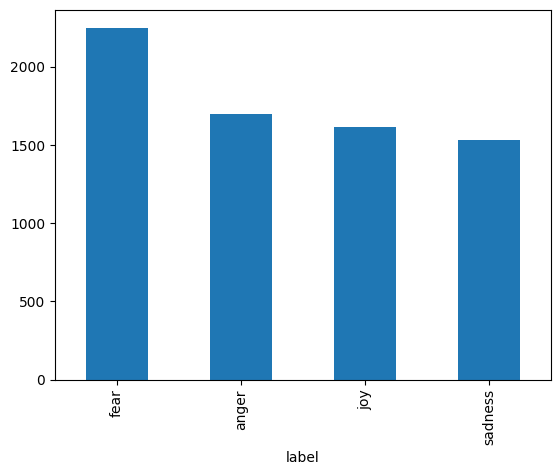

In [19]:
data['label'].value_counts().plot(kind="bar")

In [20]:
g = data.groupby('label')
data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

C:\Users\HP\AppData\Local\Temp\ipykernel_13596\2135407547.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


<Axes: xlabel='label'>

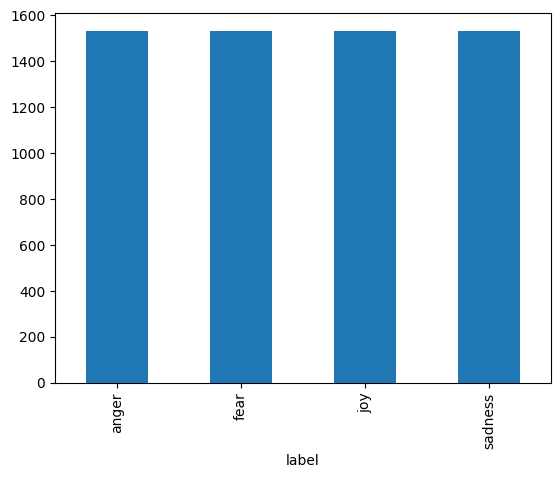

In [21]:
data['label'].value_counts().plot(kind="bar")

In [22]:
data['label_int'] = LabelEncoder().fit_transform(data['label'])

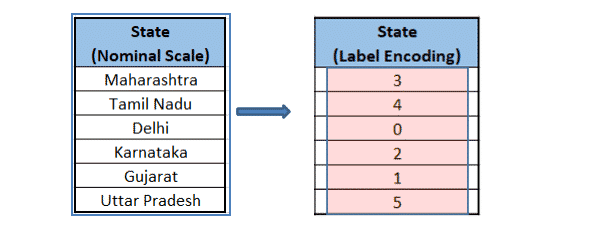

In [23]:
NUM_LABELS = 4

In [24]:
train_split, test_split = train_test_split(data, train_size = 0.8)
train_split, val_split = train_test_split(train_split, train_size = 0.9)

In [25]:
print(len(train_split))
print(len(test_split))
print(len(val_split))

4414
1227
491


In [26]:
train_df = pd.DataFrame({
    "label": train_split.label_int.values,
    "text": train_split.text_clean.values
})

test_df = pd.DataFrame({
    "label": test_split.label_int.values,
    "text": test_split.text_clean.values
})

In [27]:
train_df = datasets.Dataset.from_dict(train_df)
test_df = datasets.Dataset.from_dict(test_df)

In [28]:
type(train_df)

datasets.arrow_dataset.Dataset

###### =========================

In [29]:
# why from_dict? Let's see through an example:

 # you're trying to convert a Pandas DataFrame (train_df) into a Hugging Face datasets.Dataset

from datasets import Dataset
my_dict_ = {"a": [1, 2, 3]}
dataset_ = Dataset.from_dict(my_dict_)

In [30]:
my_dict_

{'a': [1, 2, 3]}

In [31]:
type(my_dict_)

dict

In [32]:
dataset_

Dataset({
    features: ['a'],
    num_rows: 3
})

In [33]:
type(dataset_)

datasets.arrow_dataset.Dataset

###### datasets.arrow_dataset.Dataset is the internal class used in the Hugging Face datasets library to handle datasets in an efficient, memory-mapped Arrow format. This class is typically accessed through datasets.Dataset.

###### =========================

In [34]:
dataset_dict = datasets.DatasetDict({"train":train_df, "test":test_df})

###### datasets.DatasetDict({"train":train_df, "test":test_df}) code
###### is creating a DatasetDict in Hugging Face's datasets library, which is useful for managing multiple datasets (e.g., train and test sets) in a structured way.

In [35]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 4414
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1227
    })
})

## 3️⃣ Create embeddings

In [36]:
# pip install sentencepiece

In [37]:
# pip install --upgrade sentencepiece


In [38]:
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")

In [39]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding = "max_length", max_length = 128, truncation=True)

In [40]:
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

Map: 100%|██████████| 1227/1227 [00:00<00:00, 4496.98 examples/s]


In [41]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4414
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1227
    })
})

In [42]:
print(tokenized_datasets['train']['text'][0])

 - the hunter in this way, content and joyous in simple, domestic bliss? i cannot wait for word of who you truly are to -


In [43]:
print(tokenized_datasets['train']['input_ids'][0])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 17, 13, 18, 17, 13617, 25, 52, 162, 19, 1286, 21, 30584, 25, 1369, 19, 1927, 22334, 82, 17, 150, 977, 2065, 28, 1139, 20, 61, 44, 3291, 41, 22, 17, 13, 4, 3]


In [44]:
tokenizer.decode(5)

'<pad>'

In [45]:
print(tokenized_datasets['train']['token_type_ids'][0])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]


In [46]:
print(tokenized_datasets['train']['attention_mask'][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [47]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(100))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(100))

## 4️⃣Fine tune our model

###### XlnetForSequenceClassification can load XLNet Models with sequence classification/regression head on top (a linear layer on top of the pooled output) e.g. for multi-class document classification tasks.

In [48]:
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased',
                                                       num_labels=NUM_LABELS,
                                                       id2label={0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'})

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
metric = evaluate.load("accuracy")

In [50]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [61]:
# pip install "accelerate>=0.26.0"

In [52]:
# pip install --upgrade accelerate

In [53]:
training_args = TrainingArguments(output_dir="test_trainer", eval_strategy="epoch", num_train_epochs=1)

# num_train_epochs=1 # may increase num_train_epochs value with large number for better accuracy

In [54]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics)

In [55]:
trainer.train()

# To get API key click on https://wandb.ai/site
# Login using Google account, follow instruction and copy key from first page

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.389045,0.320000
2,No log,1.439648,0.300000
3,No log,1.433273,0.340000


TrainOutput(global_step=39, training_loss=1.36247556637495, metrics={'train_runtime': 300.9729, 'train_samples_per_second': 0.997, 'train_steps_per_second': 0.13, 'total_flos': 21366375321600.0, 'train_loss': 1.36247556637495, 'epoch': 3.0})

## Evaluate model

In [56]:
trainer.evaluate()

{'eval_loss': 1.4332733154296875,
 'eval_accuracy': 0.34,
 'eval_runtime': 21.2463,
 'eval_samples_per_second': 4.707,
 'eval_steps_per_second': 0.612,
 'epoch': 3.0}

In [57]:
model.save_pretrained("fine_tuned_model")

In [58]:
fine_tuned_model = XLNetForSequenceClassification.from_pretrained("fine_tuned_model")

In [59]:
clf = pipeline("text-classification", fine_tuned_model, tokenizer=tokenizer)

Device set to use cpu


In [62]:
rand_int = random.randint(0, len(val_split))
print(val_split['text_clean'][rand_int])
answer = clf(val_split['text_clean'][rand_int], top_k=None)
print(answer)

finished writing my second book tonight. #somber #sad #youpromised #havemercy #author #writer #needpublisher #beingedited #workingonsidebook
[{'label': 'sadness', 'score': 0.5177261829376221}, {'label': 'fear', 'score': 0.21621504426002502}, {'label': 'joy', 'score': 0.13868486881256104}, {'label': 'anger', 'score': 0.12737387418746948}]


C:\Users\HP\AppData\Local\Temp\ipykernel_13596\3116462782.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(val_split['text_clean'][rand_int])
C:\Users\HP\AppData\Local\Temp\ipykernel_13596\3116462782.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  answer = clf(val_split['text_clean'][rand_int], top_k=None)
